## hello_sp.py

このスクリプトは、以下の3つの入力値セットに対する空間プーラーの効果を示す3つの例を提供します。

1. 3 つのランダムな入力値の出力 SDR を表示する。
2. 同じ入力値から生成された 3 つの SDR を表示する。
3. 元の入力ベクトルに10%と20%のノイズを追加して、わずかに異なる入力値で生成された3つのSDRを表示する。

このスクリプトでは、入力に単純なバイナリ ベクトルを使用しています。

この例を実行して出力を読んだ後、空間プーラーの入力と出力の関係を基本的に理解する必要があります。

In [1]:
"""空間プーラーの動作を示す簡単なプログラム"""

from htm.bindings.sdr import SDR
from htm.algorithms import SpatialPooler as SP

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, clear_output
%matplotlib inline

In [2]:
# Spatial Pooler と、それを使用するために必要な SDR データ構造を作成します

inputSDR  = SDR( dimensions = (32, 32) )
activeSDR = SDR( dimensions = (64, 64) )
sp = SP(inputDimensions  = inputSDR.dimensions,
        columnDimensions = activeSDR.dimensions,
        localAreaDensity = 0.02,
        globalInhibition = True,
        seed             = 1,
        synPermActiveInc   = 0.01,
        synPermInactiveDec = 0.008)

print(sp)

def run():
    print("Running the Spatial Pooler ...")
    print("")
    sp.compute(inputSDR, True, activeSDR)
    print("Active Outputs " + str(activeSDR))
    print("")

    #clear_output(wait = True)
    #plt.cla
    plt.imshow(activeSDR.dense, cmap = "Blues")
    plt.pause(0.01)

Spatial Pooler Connections:
    Inputs (1024) ~> Outputs (4096) via Segments (4096)
    Segments on Cell Min/Mean/Max 1 / 1 / 1
    Potential Synapses on Segment Min/Mean/Max 512 / 512 / 512
    Connected Synapses on Segment Min/Mean/Max 218 / 256.142 / 301
    Synapses Dead (4.29153e-06%) Saturated (4.76837e-07%)
    Synapses pruned (0%) Segments pruned (0%)




Hello Spatial Pooler.


レッスン1）異なる入力は、異なる出力を与えます
    3つのランダムな疎分散表現(SDR)を生成し、それぞれを実行します
    空間プーラーを通して  出力アクティビティが毎回異なることを観察します

----------------------------------------------------------------------
Random Input SDR( 32, 32 ) 43, 109, 161, 311, 338, 394, 411, 454, 501, 520, 562, 578, 640, 646, 715, 743, 756, 817, 876, 899



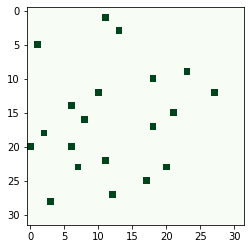

Running the Spatial Pooler ...

Active Outputs SDR( 64, 64 ) 114, 127, 177, 221, 231, 237, 246, 318, 506, 555, 575, 644, 651, 833, 843, 1141, 1317, 1413, 1694, 1710, 1758, 1905, 2037, 2274, 2314, 2347, 2348, 2375, 2440, 2539, 2579, 2629, 2702, 2745, 2761, 2768, 2772, 2784, 2790, 2844, 2882, 2904, 2927, 2955, 3061, 3085, 3100, 3123, 3124, 3129, 3169, 3188, 3213, 3216, 3230, 3262, 3303, 3377, 3379, 3384, 3399, 3466, 3492, 3539, 3559, 3635, 3665, 3671, 3681, 3689, 3703, 3711, 3718, 3794, 3809, 3833, 3855, 3903, 3950, 4010, 4030



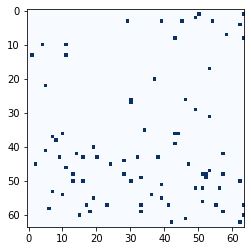

----------------------------------------------------------------------
Random Input SDR( 32, 32 ) 32, 257, 270, 289, 353, 408, 424, 490, 545, 586, 682, 707, 798, 837, 851, 887, 956, 984, 986, 996



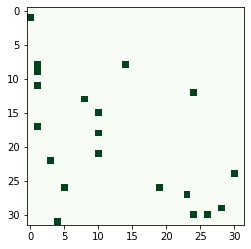

Running the Spatial Pooler ...

Active Outputs SDR( 64, 64 ) 36, 208, 650, 747, 840, 1042, 1138, 1168, 1377, 1464, 1579, 1580, 1749, 1833, 1845, 1965, 1988, 2144, 2159, 2170, 2191, 2246, 2300, 2398, 2559, 2564, 2709, 2727, 2882, 3005, 3117, 3136, 3159, 3300, 3339, 3392, 3400, 3402, 3405, 3409, 3413, 3419, 3428, 3431, 3438, 3452, 3457, 3485, 3547, 3571, 3576, 3590, 3594, 3609, 3618, 3630, 3642, 3645, 3648, 3666, 3669, 3679, 3715, 3741, 3747, 3749, 3755, 3815, 3820, 3847, 3920, 3928, 3938, 3953, 3957, 3967, 3998, 4012, 4033, 4053, 4085



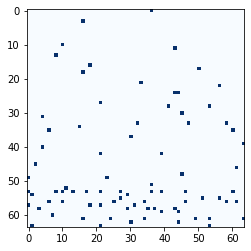

----------------------------------------------------------------------
Random Input SDR( 32, 32 ) 88, 115, 156, 165, 193, 226, 245, 268, 334, 382, 407, 422, 563, 636, 692, 711, 731, 747, 875, 979



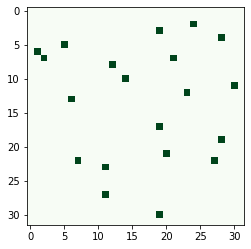

Running the Spatial Pooler ...

Active Outputs SDR( 64, 64 ) 112, 179, 269, 308, 435, 450, 484, 492, 544, 651, 669, 779, 803, 891, 966, 984, 1172, 1329, 1413, 1614, 1718, 1725, 1889, 1914, 1968, 2005, 2032, 2193, 2201, 2212, 2226, 2272, 2288, 2360, 2533, 2601, 2608, 2651, 2692, 2884, 2932, 2937, 2976, 3115, 3121, 3122, 3226, 3323, 3372, 3402, 3428, 3459, 3488, 3489, 3494, 3497, 3529, 3558, 3563, 3580, 3619, 3634, 3641, 3668, 3679, 3710, 3717, 3722, 3744, 3748, 3786, 3816, 3843, 3866, 3895, 3952, 3965, 3987, 4020, 4043, 4049



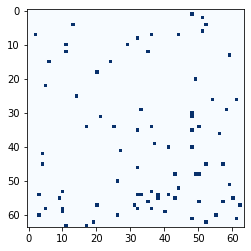

Spatial Pooler Connections:
    Inputs (1024) ~> Outputs (4096) via Segments (4096)
    Segments on Cell Min/Mean/Max 1 / 1 / 1
    Potential Synapses on Segment Min/Mean/Max 512 / 512 / 512
    Connected Synapses on Segment Min/Mean/Max 218 / 256.033 / 301
    Synapses Dead (0.00229406%) Saturated (1.19209e-05%)
    Synapses pruned (0%) Segments pruned (0%)



In [3]:
# レッスン1 ランダム入力を試してみる
print("")
print("Hello Spatial Pooler.")
print("")
print("")
print("レッスン1）異なる入力は、異なる出力を与えます")
print("    3つのランダムな疎分散表現(SDR)を生成し、それぞれを実行します")
print("    空間プーラーを通して  出力アクティビティが毎回異なることを観察します")
print("")

for i in range(3):
    print("----------------------------------------------------------------------")
    inputSDR.randomize( .02 )
    print("Random Input " + str(inputSDR))
    print("")
    
    #clear_output(wait = True)
    #plt.cla
    plt.imshow(inputSDR.dense, cmap = "Greens")
    plt.pause(0.01)
    
    run()
print(sp)



レッスン2) 同一の入力は同一の出力を与える
    入力SDRは、空間プーラーの前の実行で使用されたものと同じである

Input SDR( 32, 32 ) 88, 115, 156, 165, 193, 226, 245, 268, 334, 382, 407, 422, 563, 636, 692, 711, 731, 747, 875, 979



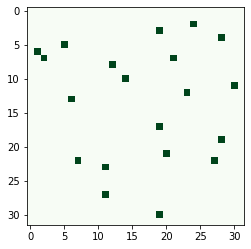

Running the Spatial Pooler ...

Active Outputs SDR( 64, 64 ) 112, 179, 269, 308, 435, 450, 484, 492, 544, 651, 669, 779, 803, 891, 966, 984, 1172, 1329, 1413, 1614, 1718, 1725, 1889, 1914, 1968, 2005, 2032, 2193, 2201, 2212, 2226, 2272, 2288, 2360, 2533, 2601, 2608, 2651, 2692, 2884, 2932, 2937, 2976, 3115, 3121, 3122, 3226, 3323, 3372, 3402, 3428, 3459, 3488, 3489, 3494, 3497, 3529, 3558, 3563, 3580, 3619, 3634, 3641, 3668, 3679, 3710, 3717, 3722, 3744, 3748, 3786, 3816, 3843, 3866, 3895, 3952, 3965, 3987, 4020, 4043, 4049



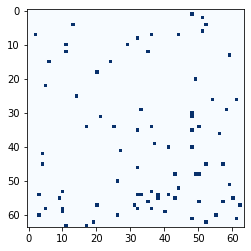

In [4]:
# レッスン２ 同一の入力を試す
print("=" * 70)
print("")
print("")
print("レッスン2) 同一の入力は同一の出力を与える")
print("    入力SDRは、空間プーラーの前の実行で使用されたものと同じである")
print("")
print("Input " + str(inputSDR))
print("")

plt.imshow(inputSDR.dense, cmap = "Greens")
plt.pause(0.01)
    
run()



レッスン3）似たような入力は似たような出力を与えます
          今は入力SDRを少し変えています
          1を0に、0を1に少しずつ変えていきます
          結果として得られるSDRは、元のSDRと類似していますが、同一ではありません

前の実行から入力SDRに10%のノイズを追加します
Input SDR( 32, 32 ) 88, 156, 165, 193, 226, 239, 245, 268, 304, 334, 407, 422, 563, 636, 692, 711, 731, 747, 875, 979



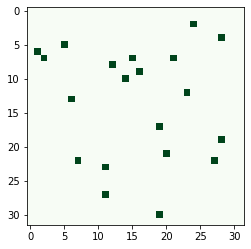

Running the Spatial Pooler ...

Active Outputs SDR( 64, 64 ) 112, 179, 269, 450, 484, 492, 544, 651, 704, 779, 914, 966, 984, 1172, 1329, 1351, 1614, 1718, 1725, 1885, 1889, 1906, 1912, 1914, 1968, 2005, 2032, 2193, 2212, 2226, 2272, 2288, 2347, 2360, 2533, 2608, 2651, 2692, 2720, 2906, 2932, 2937, 2963, 3115, 3121, 3122, 3226, 3372, 3402, 3459, 3486, 3488, 3489, 3494, 3497, 3529, 3558, 3563, 3580, 3587, 3619, 3641, 3668, 3679, 3710, 3717, 3722, 3738, 3748, 3765, 3786, 3837, 3866, 3895, 3952, 3965, 3980, 4020, 4043, 4049, 4052



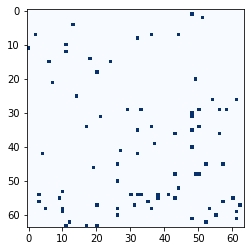

出力SDRがほとんど変化していないことに注目してください


入力SDRにさらに20%のノイズを追加
Input SDR( 32, 32 ) 2, 88, 156, 165, 219, 226, 245, 268, 287, 304, 334, 407, 422, 563, 636, 711, 747, 816, 875, 979



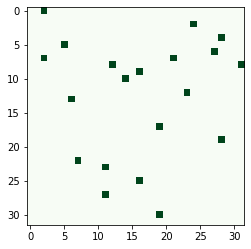

Running the Spatial Pooler ...

Active Outputs SDR( 64, 64 ) 112, 228, 269, 320, 330, 335, 348, 450, 453, 484, 492, 562, 653, 779, 883, 914, 966, 984, 997, 1172, 1228, 1350, 1614, 1618, 1624, 1718, 1889, 1906, 1914, 1968, 2005, 2016, 2112, 2211, 2212, 2272, 2276, 2288, 2347, 2360, 2417, 2514, 2533, 2608, 2651, 2692, 2709, 2721, 2723, 2818, 2855, 2884, 2906, 2932, 3035, 3062, 3115, 3121, 3138, 3226, 3282, 3305, 3308, 3372, 3489, 3494, 3558, 3641, 3668, 3679, 3710, 3717, 3748, 3786, 3866, 3952, 3965, 3980, 3994, 4020, 4043



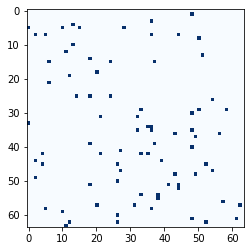

今までの出力SDRとは大きく異なります
しかし、出力の間にはまだ似たようなものがあります

End.


In [5]:
# レッスン3、似たような入力を試してみる
print("=" * 70)
print("")
print("")
print("レッスン3）似たような入力は似たような出力を与えます")
print("          今は入力SDRを少し変えています")
print("          1を0に、0を1に少しずつ変えていきます")
print("          結果として得られるSDRは、元のSDRと類似していますが、同一ではありません")
print("")

print("前の実行から入力SDRに10%のノイズを追加します")
inputSDR.addNoise(0.10)
print("Input " + str(inputSDR))
print("")
plt.imshow(inputSDR.dense, cmap = "Greens")
plt.pause(0.01)
run()

print("出力SDRがほとんど変化していないことに注目してください")
print("")
print("")
print("入力SDRにさらに20%のノイズを追加")
inputSDR.addNoise(0.2)
print("Input " + str(inputSDR))
print("")
plt.imshow(inputSDR.dense, cmap = "Greens")
plt.pause(0.01)
run()

print("今までの出力SDRとは大きく異なります")
print("しかし、出力の間にはまだ似たようなものがあります")
print("")
print("End.")